<a href="https://colab.research.google.com/github/river6907/Bigdata-Analysis/blob/main/Report4_irisClassification_%EA%B0%95%EB%8F%99%EC%A4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Report 4. iris classification 연습 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
# (1)scikit learn 제공  iris 데이터 셋 가져오기
from sklearn.datasets import load_iris
iris = load_iris()

#iris는 key-value로 구성된 dictionary 와 유사한 bounch class
# dataset key값 확인
print("iris_dataset의 key: ", iris.keys())

#데이터 설명을 포함한 'DESCR' key의  value 일부확인, 
print(iris['DESCR'][:500] + "\n...")

#데이터 셋 확인
print("target 이름: ", iris['target_names'])
print("feature 이름: ", iris['feature_names'])
print("data의 타입: ", type(iris['data']))  #x, features
print("data의 크기: ", iris['data'].shape)
print("data의 처음 다섯 행: ", iris['data'][:5])
print("target의 타입: ", type(iris['target']))
print("target:", iris['target'])   #y, target, class

iris_dataset의 key:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                

...
target 이름:  ['setosa' 'versicolor' 'virginica']
feature 이름:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
data의 타입:  <class 'numpy.ndarray'>
data의 크기:  (150, 4)
data의 처음 다섯 행:  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
target의 타입:  <class 'numpy.ndarray'>
target: [0 0 0 0 0 

In [4]:
# (2)모델링을 위한 x, y 값 설정
irisX = iris['data']
irisy = iris['target']

# (3)데이터에 대한 모델을 평가하기위해 학습 세트 와 테스트 세트 로 분리
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(irisX, irisy,
                                                random_state=1) #testset 25% 
print("Xtrain.shape : ", Xtrain.shape)
print("ytrain.shape : ", ytrain.shape)
print("Xtest.shape : ", Xtest.shape)
print("ytest.shape : ", ytest.shape)

#(4)Modeling
# 학습데이터로  GaussianNB 알고리즘으로 모델링
from sklearn.naive_bayes import GaussianNB  #GaussianNB 모듈 가져오기  
model = GaussianNB()                         # 모델 객체 생성
model.fit(Xtrain, ytrain)                    #학습데이터를 이용하여 모델링
y_pred = model.predict(Xtest)               # 새로운 데이터 예측
print("테스트 세트에 대한 목표값:", ytest)
print("테스트 세트에 대한 예측값:", y_pred)
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == ytest)))

#(5)예측결과에 대한 성능 확인 
from sklearn.metrics import accuracy_score
acc = accuracy_score(ytest, y_pred)
print("accuracy_score = {:.2f}".format(acc))

Xtrain.shape :  (112, 4)
ytrain.shape :  (112,)
Xtest.shape :  (38, 4)
ytest.shape :  (38,)
테스트 세트에 대한 목표값: [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0]
테스트 세트에 대한 예측값: [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0]
테스트 세트의 정확도: 0.97
accuracy_score = 0.97


k= 1 score= 0.97
k= 3 score= 0.97
k= 5 score= 0.95
k= 7 score= 0.95


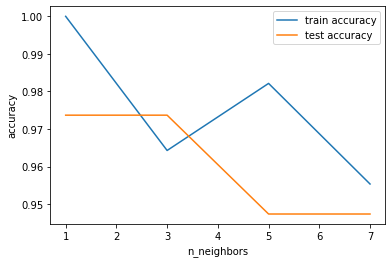

In [10]:
# iris classification (k-NN)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, random_state=1) #target 비율에 맞추어 추출

training_accuracy = []
test_accuracy = []
# 1 에서 10 까지 n_neighbors 를 적용
neighbors_settings = range(1,8,2)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 테스트 세트 정확도 저장
    s = clf.score(X_test, y_test)
    print("k=", n_neighbors, "score= {:.2f}".format(s))
    test_accuracy.append(s)
    
plt.plot(neighbors_settings, training_accuracy, label="train accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()